In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("./healthcare-dataset-stroke-data.csv")
data.head()
data.shape

(5110, 12)

In [ ]:
data[data.isnull().any(axis=1)].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [ ]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

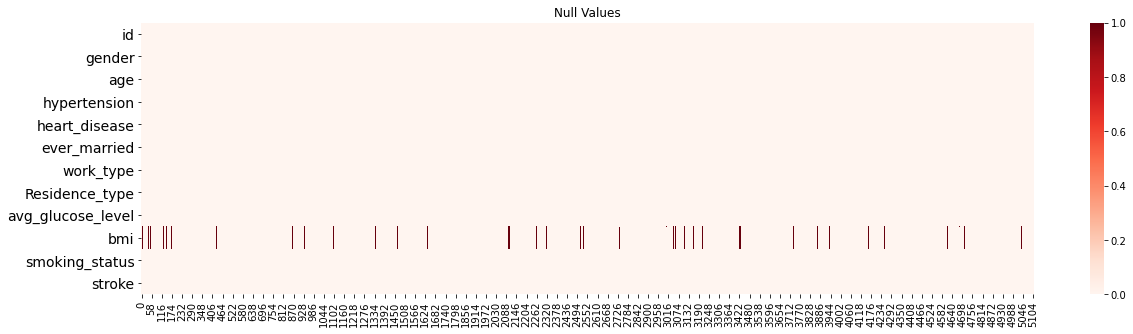

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20,5))

sns.heatmap(data.T.isna(), cmap='Reds')
ax.set_title('Null Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(),inplace=True)
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


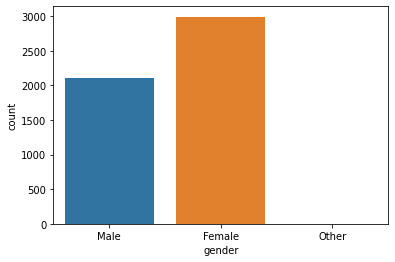

In [ ]:
print(data.gender.value_counts())
sns.countplot(data['gender']);

In [ ]:
data.gender.replace({'Other':"Female"}, inplace=True)

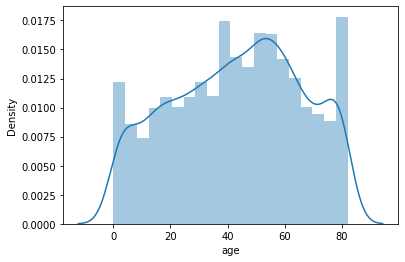

In [ ]:
sns.distplot(data['age']);

0    4612
1     498
Name: hypertension, dtype: int64


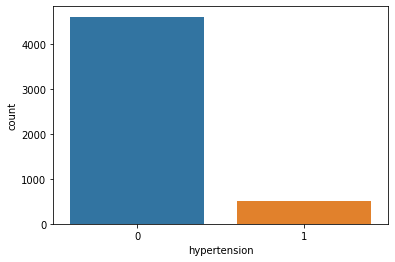

In [ ]:
print(data.hypertension.value_counts())
sns.countplot(data['hypertension']);

0    4834
1     276
Name: heart_disease, dtype: int64


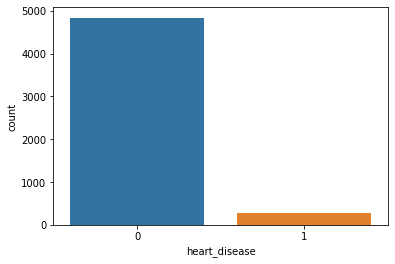

In [ ]:
print(data.heart_disease.value_counts())
sns.countplot(data['heart_disease']);

Yes    3353
No     1757
Name: ever_married, dtype: int64


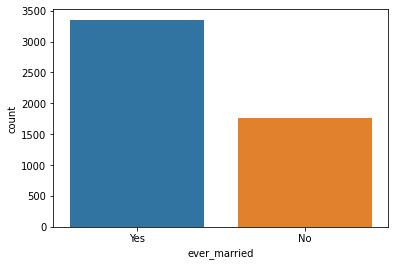

In [ ]:
print(data.ever_married.value_counts())
sns.countplot(data['ever_married']);

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


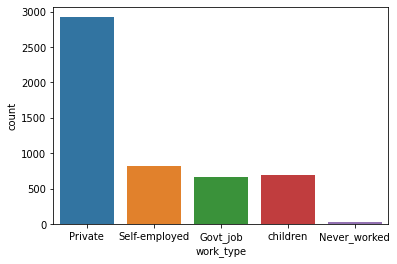

In [ ]:
print(data.work_type.value_counts())
sns.countplot(data['work_type']);

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


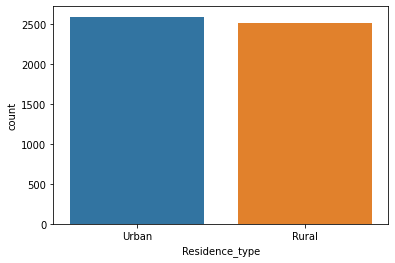

In [ ]:
print(data.Residence_type.value_counts())
sns.countplot(data['Residence_type']);

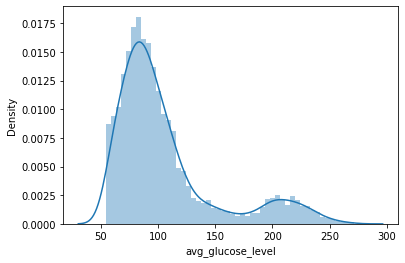

In [ ]:
sns.distplot(data['avg_glucose_level']);

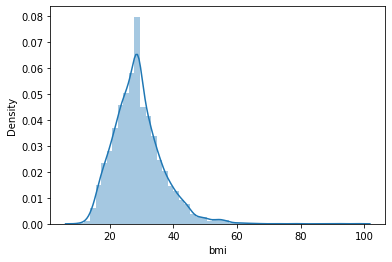

In [ ]:
sns.distplot(data['bmi']);

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


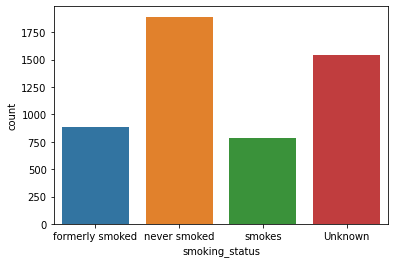

In [ ]:
print(data.smoking_status.value_counts())
sns.countplot(data['smoking_status']);

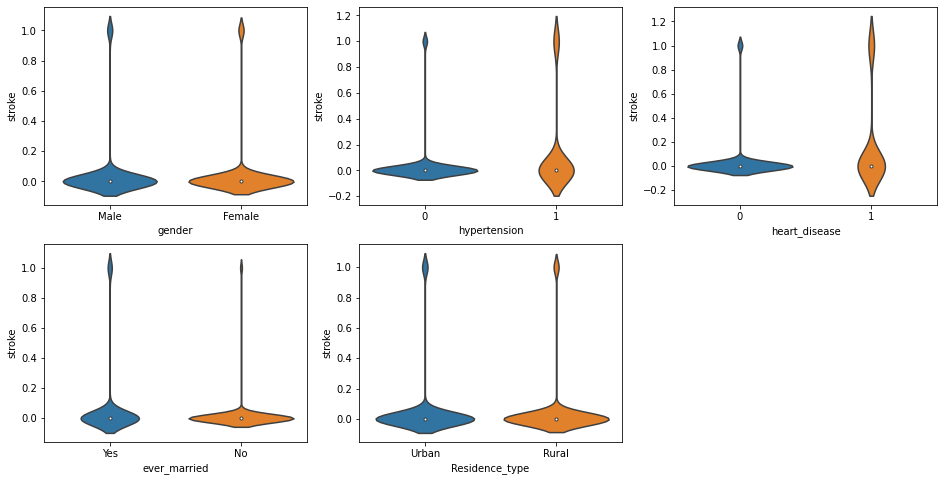

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=data)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=data)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=data)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=data)
plt.subplot(2,3,5)
sns.violinplot(x='Residence_type',y='stroke',data=data)
plt.show();

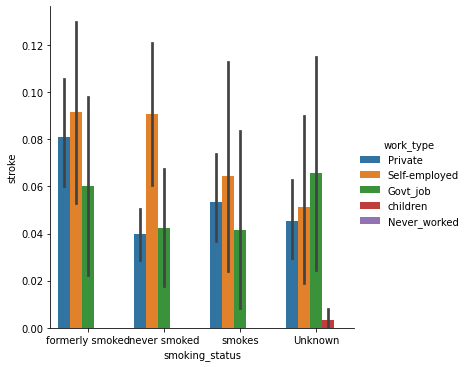

In [ ]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data);

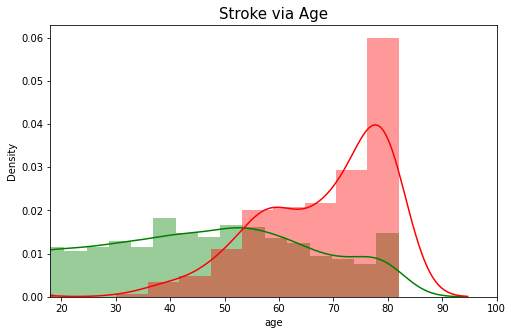

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(data[data['stroke'] == 0]['age'],color='green')
sns.distplot(data[data['stroke'] == 1]['age'],color='red')
plt.title('Stroke via Age',fontsize=15)
plt.xlim([18,100]);

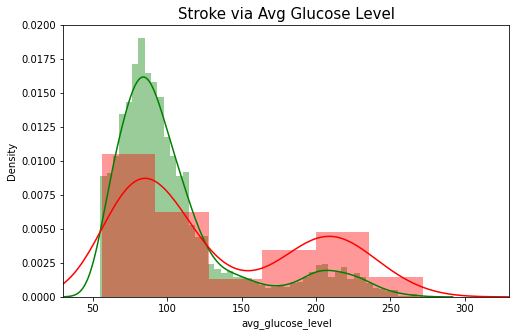

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(data[data['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(data[data['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('Stroke via Avg Glucose Level',fontsize=15)
plt.xlim([30,330]);

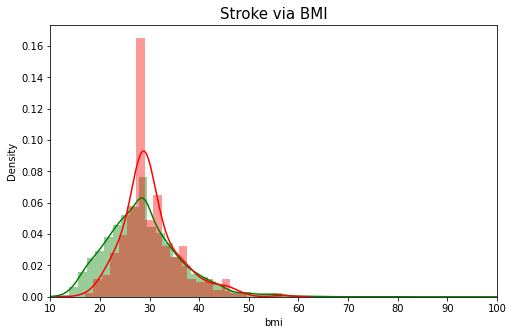

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(data[data['stroke'] == 0]['bmi'],color='green')
sns.distplot(data[data['stroke'] == 1]['bmi'],color='red')
plt.title('Stroke via BMI',fontsize=15)
plt.xlim([10,100]);

In [ ]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


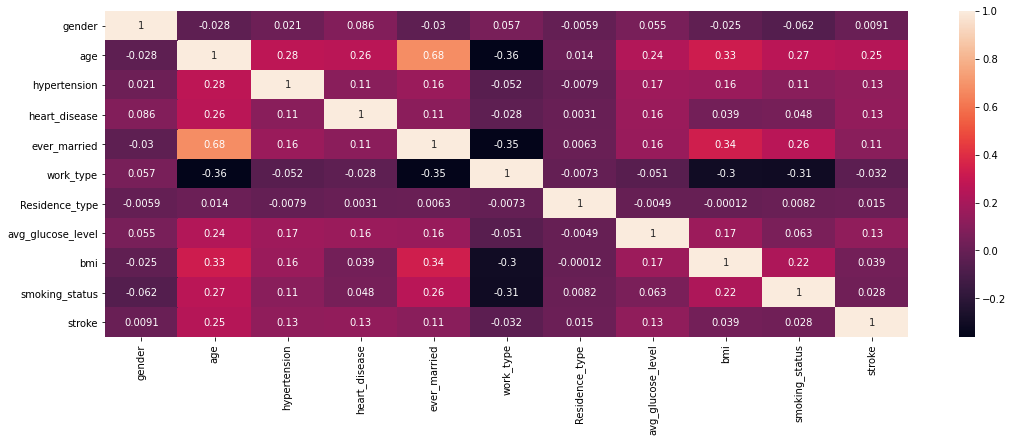

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(data.corr(method='pearson'), annot=True);

In [ ]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=10, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(),
    'SVC': SVC()
}

params = {
    'KNeighborsClassifier': { 'n_neighbors': [2, 4, 7, 10, 15] },
    'LogisticRegression': { 'max_iter': [100, 150, 200, 300] },
    'RandomForestClassifier': { 'n_estimators': [50, 100, 150, 250] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 24, 32, 64] },
    'XGBClassifier': { 'n_estimators': [16, 24, 32, 64] },
    'SVC': { 'C': [1, 10, 100, 1e3, 1e4], 'gamma': [0.001, 0.0001] }
}

In [ ]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, scoring='f1', n_jobs=3)

Running GridSearchCV for KNeighborsClassifier.
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   19.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   22.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   33.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    8.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for XGBClassifier.
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    5.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for SVC.
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  2.9min finished


In [ ]:
helper.score_summary(sort_by='max_score')

KNeighborsClassifier
LogisticRegression
RandomForestClassifier
AdaBoostClassifier
XGBClassifier
SVC


,estimator,min_score,mean_score,max_score,std_score,n_neighbors,max_iter,n_estimators,C,gamma
12,RandomForestClassifier,0.962179,0.970513,0.977444,0.00485326,NaN,NaN,250,NaN,NaN
11,RandomForestClassifier,0.962631,0.970374,0.977444,0.00428792,NaN,NaN,150,NaN,NaN
9,RandomForestClassifier,0.963526,0.970361,0.975904,0.0043303,NaN,NaN,50,NaN,NaN
10,RandomForestClassifier,0.960606,0.968394,0.975904,0.0053908,NaN,NaN,100,NaN,NaN
20,XGBClassifier,0.950076,0.959141,0.972973,0.00760059,NaN,NaN,64,NaN,NaN
16,AdaBoostClassifier,0.940994,0.951609,0.965414,0.00725704,NaN,NaN,64,NaN,NaN
0,KNeighborsClassifier,0.946763,0.953064,0.960813,0.00463931,2,NaN,NaN,NaN,NaN
15,AdaBoostClassifier,0.921212,0.93248,0.949405,0.0082173,NaN,NaN,32,NaN,NaN
1,KNeighborsClassifier,0.922426,0.933233,0.945245,0.00630913,4,NaN,NaN,NaN,NaN
19,XGBClassifier,0.906344,0.92666,0.939759,0.00986923,NaN,NaN,32,NaN,NaN


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# create a dictionary to hold accuracy scores for each model
scores = dict()
results = []

In [ ]:
my_knn = KNeighborsClassifier(n_neighbors = 2)
score_list = cross_val_score(my_knn, X, y, scoring='accuracy', cv=10, n_jobs=3, error_score='raise')
probs_knn = cross_val_predict(my_knn, X_test, y_test, cv=10, method='predict_proba')
scores['knn'] = score_list.mean()
results.append(score_list)

In [ ]:
my_lr = LogisticRegression(max_iter=200, random_state=1)
score_list = cross_val_score(my_lr, X, y, scoring='accuracy', cv=10, n_jobs=3, error_score='raise')
probs_lr = cross_val_predict(my_lr, X_test, y_test, cv=10, method='predict_proba')
scores['lr'] = score_list.mean()
results.append(score_list)

In [ ]:
my_rf = RandomForestClassifier(n_estimators=250, bootstrap = True, random_state=1)
score_list = cross_val_score(my_rf, X, y, scoring='accuracy', cv=10, n_jobs=3, error_score='raise')
probs_rf = cross_val_predict(my_rf, X_test, y_test, cv=10, method='predict_proba')
scores['rf'] = score_list.mean()
results.append(score_list)

In [ ]:
my_adb = AdaBoostClassifier(n_estimators=64, random_state=1)
score_list = cross_val_score(my_adb, X, y, scoring='accuracy', cv=10, n_jobs=3, error_score='raise')
probs_adb = cross_val_predict(my_adb, X_test, y_test, cv=10, method='predict_proba')
scores['adb'] = score_list.mean()
results.append(score_list)

In [ ]:
my_xgb = XGBClassifier(n_estimators=64, random_state=1)
score_list = cross_val_score(my_xgb, X, y, scoring='accuracy', cv=10, n_jobs=3, error_score='raise')
probs_xgb = cross_val_predict(my_xgb, X_test, y_test, cv=10, method='predict_proba')
scores['xgb'] = score_list.mean()
results.append(score_list)

In [ ]:
my_svm = SVC(C=10000, gamma=0.001, random_state=1, probability=True)
score_list = cross_val_score(my_svm, X, y, scoring='accuracy', cv=5, n_jobs=2, error_score='raise')
probs_svm = cross_val_predict(my_svm, X_test, y_test, cv=5, method='predict_proba')
scores['svm'] = score_list.mean()
results.append(score_list)

In [ ]:
from sklearn import metrics

# get the fpr/tpr of each classifier
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, probs_knn[:,1], pos_label=1)
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, probs_lr[:,1], pos_label=1)
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, probs_rf[:,1], pos_label=1)
fpr_adb, tpr_adb, thresholds = metrics.roc_curve(y_test, probs_adb[:,1], pos_label=1)
fpr_xgb, tpr_xgb, thresholds = metrics.roc_curve(y_test, probs_xgb[:,1], pos_label=1)
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, probs_svm[:,1], pos_label=1)


# get the auc from each fpr/tpr, we'll use these
# to make a ROC curve in our eval section
auc_knn = metrics.auc(fpr_knn, tpr_knn)
auc_lr = metrics.auc(fpr_lr, tpr_lr)
auc_rf = metrics.auc(fpr_rf, tpr_rf)
auc_adb = metrics.auc(fpr_adb, tpr_adb)
auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
auc_svm = metrics.auc(fpr_svm, tpr_svm)

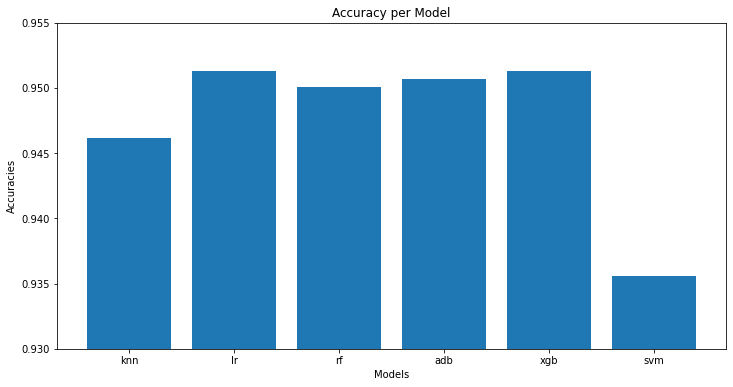

In [ ]:
# now we can plot all our accuracies on a bar chart
model_names = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(12, 6))

plt.bar(range(len(scores)), values, tick_label=model_names)

# display the labels, title, and legends
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Accuracy per Model')

plt.ylim([0.93, .955])
plt.show();

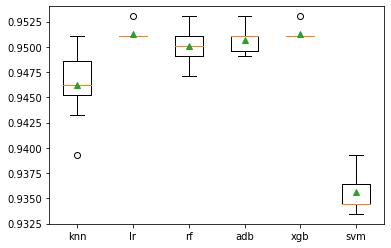

In [ ]:
# view box plot for ensemble learning and stacking models
# evaluation
names = []
for k, v in scores.items():
  names.append(k)


plt.boxplot(results, labels=names, showmeans=True)
plt.show();

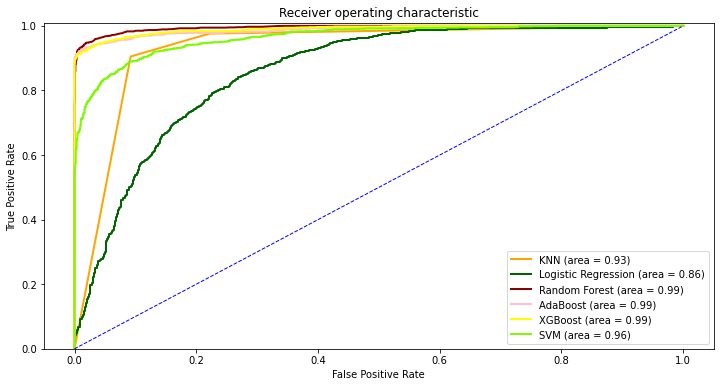

In [ ]:
# keep figure inline
%matplotlib inline

# plot
plt.figure(figsize=(12, 6))

# knn roc curve
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, 
         label='KNN (area = %0.2f)' % auc_knn)

# logistic regression tree roc curve
plt.plot(fpr_lr, tpr_lr, color='darkgreen', lw=2, 
         label='Logistic Regression (area = %0.2f)' % auc_lr)

# random forest roc curve
plt.plot(fpr_rf, tpr_rf, color='darkred', lw=2, 
         label='Random Forest (area = %0.2f)' % auc_rf)

# adaboost roc curve
plt.plot(fpr_adb, tpr_adb, color='pink', lw=2, 
         label='AdaBoost (area = %0.2f)' % auc_adb)

# xgboost roc curve
plt.plot(fpr_xgb, tpr_xgb, color='yellow', lw=2, 
         label='XGBoost (area = %0.2f)' % auc_xgb)

# SVM roc curve
plt.plot(fpr_svm, tpr_svm, color='lawngreen', lw=2, 
         label='SVM (area = %0.2f)' % auc_svm)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# define the ranges
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.01])

# display the labels, title, and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# print
plt.show();

In [ ]:
classifier = RandomForestClassifier(n_estimators=250, bootstrap = True, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = metrics.confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print(f'ROC AUC score: {metrics.roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1453
           1       0.99      0.96      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917

ROC AUC score: 0.995635795922512
Accuracy Score:  0.9712032910524512


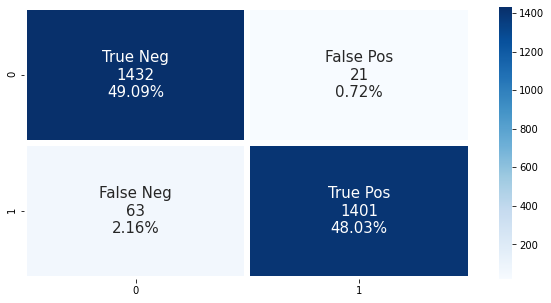

In [ ]:
plt.figure(figsize = (10, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', linewidths = 5, cmap='Blues', annot_kws = {'fontsize': 15})
plt.show();

In [ ]:
classifier = AdaBoostClassifier(n_estimators=64, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = metrics.confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print(f'ROC AUC score: {metrics.roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1453
           1       0.99      0.93      0.96      1464

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917

ROC AUC score: 0.9881218996686711
Accuracy Score:  0.9609187521426122


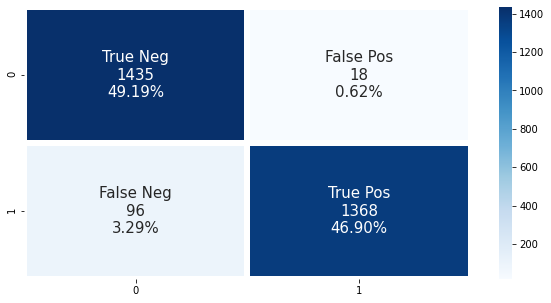

In [ ]:
plt.figure(figsize = (10, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', linewidths = 5, cmap='Blues', annot_kws = {'fontsize': 15})
plt.show();

In [ ]:
classifier = XGBClassifier(n_estimators=64, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = metrics.confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print(f'ROC AUC score: {metrics.roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1453
           1       1.00      0.94      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917

ROC AUC score: 0.9907138142678236
Accuracy Score:  0.9660610215975317


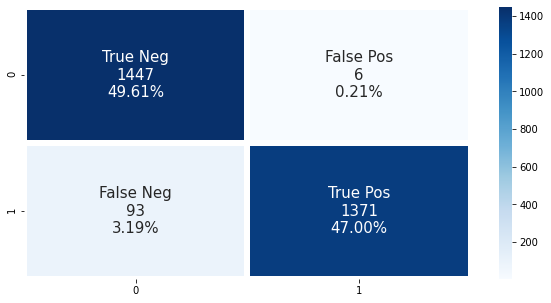

In [ ]:
plt.figure(figsize = (10, 5))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', linewidths = 5, cmap='Blues', annot_kws = {'fontsize': 15})
plt.show();